# Mutant motility drug response
---

### Overview
This notebook examines the effects of a variety of drugs on two motility mutants of _Chlamydomonas reinhardtii_.

**Strains of _Chlamydomonas reinhardtii_**

| Strain  | Class   | Human gene | Human disease             | Description                                                                                |
|---------|---------|------------|---------------------------|--------------------------------------------------------------------------------------------|
| cc-125  | Control |            |                           | [wild type mt+ [137c]](https://www.chlamycollection.org/product/cc-125-wild-type-mt-137c/) |
| cc-2670 | Mutant  | DNALI1     | Spermatogenic failure  83 | [ida4 mt+](https://www.chlamycollection.org/product/cc-2670-ida4-mt/)                      |
| cc-3707 | Mutant  | SPEF2      | Spermatogenic failure  43 | [cpc1-1 mt-](https://www.chlamycollection.org/product/cc-3707-cpc1-1-mt/)                  |

**Drugs**

| Drug        | MOA              | Effect on Human Sperm motility | Effect on Chlamydomonas motility | Source/Batch |
|-------------|------------------|--------------------------------|----------------------------------|--------------|
|  Torin2     | mTOR inhibitor   |               196              |                 -                |              |
|  TAK-063    | PDE10A Inhibitor |               145              |                 -                |              |
|  Linsitinib | IGF-1R Inhibitor |               191              |                 -                |              |
| Ibudilast   | PDE Inhibitor    |               167              |       Increased phototaxis       |              |
| Dynarrestin | Dynein Inhibitor |                -               |                 -                |              |
| ATP         | Energy           |                -               |                 -                |              |

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Configure matplotlib styles to match the Arcadia style guide.

In [2]:
import arcadia_pycolor as apc

apc.mpl.setup()

In [3]:
motility_metrics_csv = Path("../data/summary_motility_metrics.csv")
motility_metrics_dataframe = pd.read_csv(motility_metrics_csv)
motility_metrics_dataframe.head()

,total_time,total_distance,net_distance,max_sprint_length,confinement_ratio,mean_curvilinear_speed,mean_linear_speed,mean_angular_speed,num_rotations,num_direction_changes,pivot_rate,cell_count,strain,drug,concentration,well_ID
0,20.704225,230.867728,147.046824,7.562634,0.636931,11.150754,7.102262,1.526070,2.0,17,0.073635,15,cc125,tor,12.5,WellA01
1,11.901408,382.449800,125.138478,17.248704,0.327202,32.134835,10.514594,2.686931,2.0,21,0.054909,15,cc125,tor,12.5,WellA01
2,20.704225,156.499828,110.772470,7.823802,0.707812,7.558835,5.350235,2.427813,2.0,34,0.217253,15,cc125,tor,12.5,WellA01
3,20.704225,411.206653,164.362285,12.917934,0.399707,19.861002,7.938587,1.467109,1.0,16,0.038910,15,cc125,tor,12.5,WellA01
4,20.704225,154.341462,107.157320,6.164652,0.694287,7.454588,5.175626,2.173751,0.0,26,0.168458,15,cc125,tor,12.5,WellA01


In [4]:
# controls
control_strain = "cc125"
control_drugs = [
    "dmso",
    "h2o",
]

# mutants
mutants = [
    "cc2670",
    "cc3707",
]

# drugs
drugs = [
    "atp",
    "dyn",
    "ibu",
    "lin",
    "tak",
    "tor",
]

# motility metrics
metrics = [
    "confinement_ratio",
    # "mean_curvilinear_speed",
    # "mean_linear_speed",
    # "mean_angular_speed",
    # "pivot_rate",
]

nomenclature = {
    "cc125": "WT",
    "cc2670": "ida4",
    "cc3707": "cpc1",
    "atp": "atp",
    "dyn": "dyn",
    "ibu": "ibu",
    "lin": "lin",
    "tak": "tak",
    "tor": "tor",
}

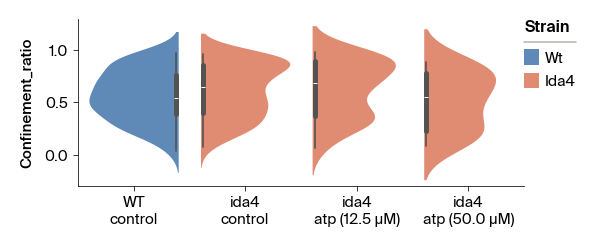

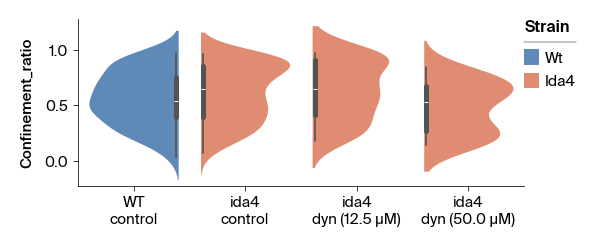

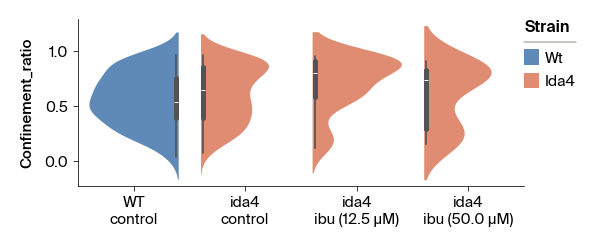

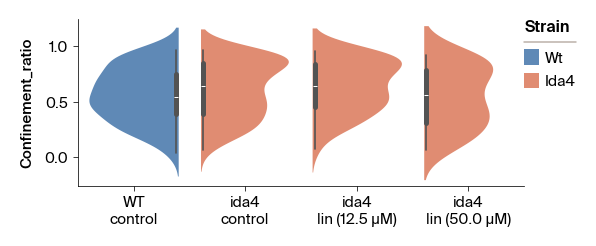

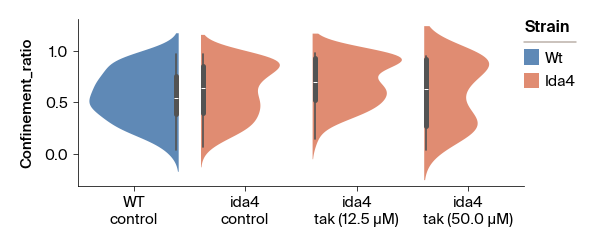

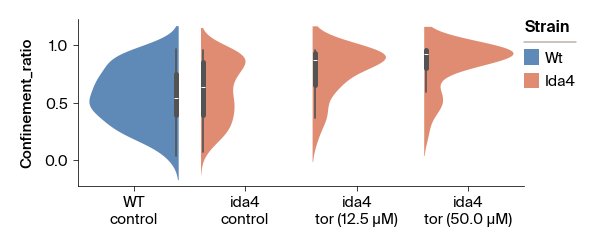

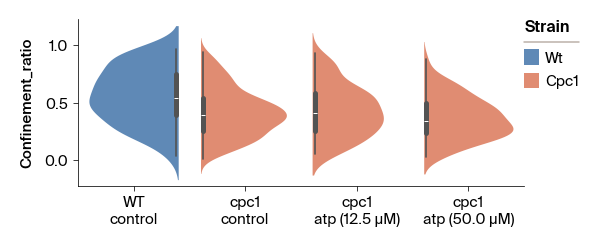

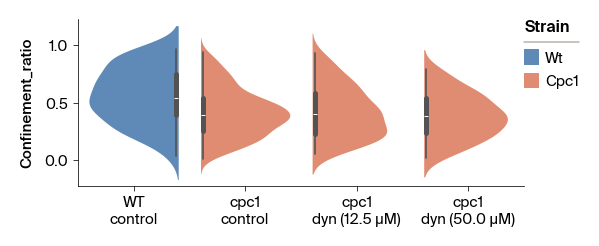

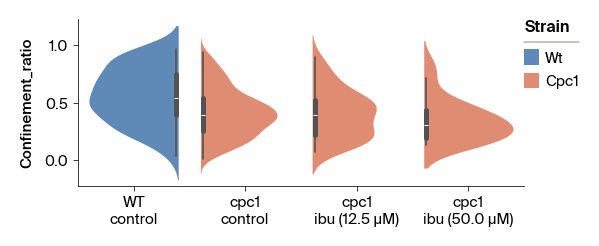

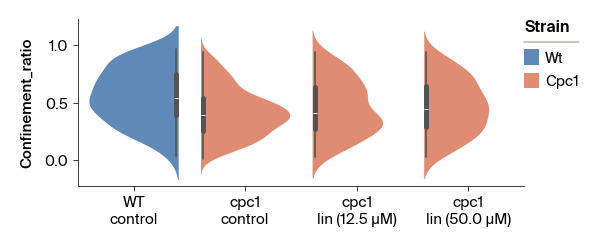

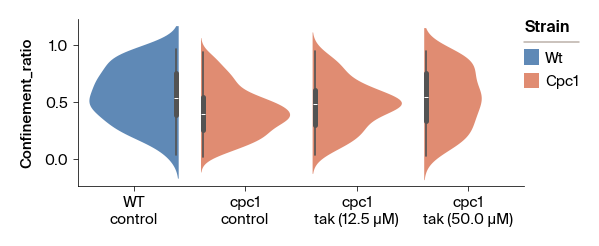

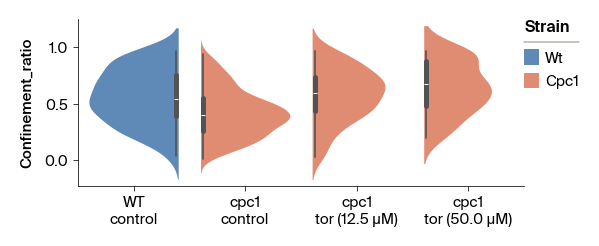

In [5]:
motility_controls_dataframe = motility_metrics_dataframe.loc[
    (motility_metrics_dataframe["strain"] == control_strain)
    & (motility_metrics_dataframe["drug"].isin(control_drugs))
]

for metric in metrics:
    for mutant in mutants:
        motility_mutant_controls_dataframe = motility_metrics_dataframe.loc[
            (motility_metrics_dataframe["strain"] == mutant)
            & (motility_metrics_dataframe["drug"].isin(control_drugs))
        ]

        for drug in drugs:
            # filter
            group = motility_metrics_dataframe.loc[
                (motility_metrics_dataframe["strain"] == mutant)
                & (motility_metrics_dataframe["drug"] == drug)
            ]

            # combine each group with the motility data from the control group
            source = pd.concat(
                [motility_controls_dataframe, motility_mutant_controls_dataframe, group]
            )
            source["strain"] = source["strain"].map(nomenclature)

            source["contrived_x_axis"] = ""
            for i, row in source.iterrows():
                if row["strain"] == control_strain:
                    label = "control"
                elif row["drug"] in control_drugs:
                    label = "control"
                else:
                    label = f"{drug} ({row["concentration"]} µM)"
                source.loc[i, "contrived_x_axis"] = f"{row['strain']}\n{label}"

            # render violin plot
            fig, ax = plt.subplots(figsize=(8, 3))
            g = sns.violinplot(
                data=source,
                x="contrived_x_axis",
                y=metric,
                hue="strain",
                inner="box",
                inner_kws={"box_width": 5},
                split=True,
                ax=ax,
            )

            # aesthetics
            sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
            apc.mpl.style_plot(ax)
            ax.set_xlabel("")
            # fig.suptitle(drug)
            sns.despine()